In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None

In [3]:
def histogram_equalization(f):
    # Get image details
    L = 256
    M, N = f.shape

    # Get histogram
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    cdf = hist.cumsum()

    # Define transformation
    t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)]).astype("uint8")

    return t[f]


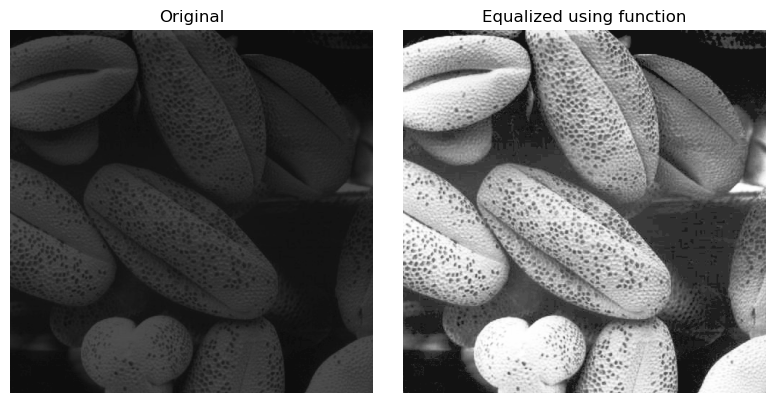

In [4]:
# Do histrogram equalization
equalized = histogram_equalization(shells)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized using function')
ax[1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()

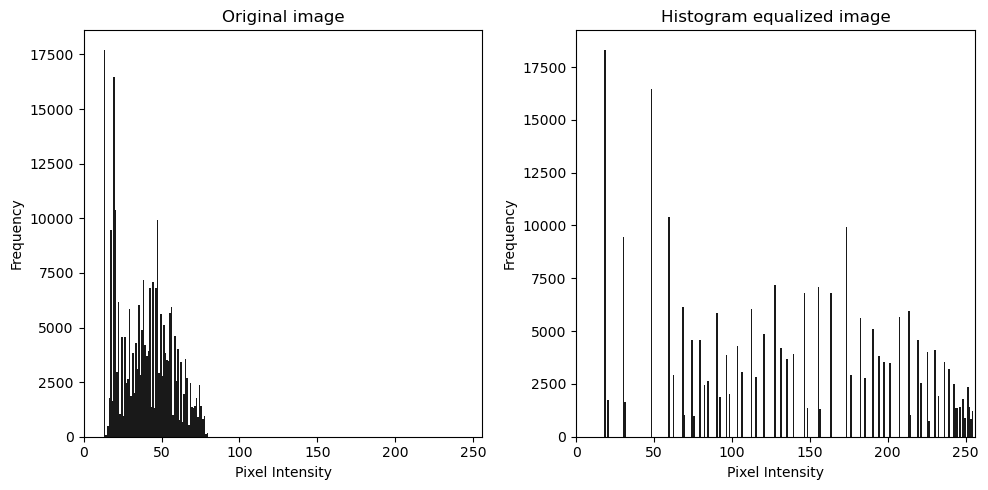

In [5]:
# Compute the histograms for both images
hist1 = cv.calcHist([shells], [0], None, [256], [0, 256])
hist2 = cv.calcHist([equalized], [0], None, [256], [0, 256])

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

shells_flat = shells.flatten()
equalized_flat = equalized.flatten()

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(shells_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(equalized_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Histogram equalized image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()